# Data Wrangling

## Instruction

For this assignment you will work with data from the web. Your goal is to scrape it or request it, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  

### Task (a): scrape it

Identify a website page showing information you find interesting. The information should be presented across more than one page. Select one of this pages (the rest is for later) and using `rvest` (and the suit of `tidyverse` libraries we used so far, plus any other one you may need) get the html into R.

In [1]:
# Load the libraries

In [2]:
library(tidyverse)
library(magrittr)
library(purrr)
library(glue)
library(stringr)
library(rvest)
library(polite)
library(xml2)

Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract


Warning message:
"package 'rvest' was built under R version 4.2.3"

Attaching package

In [3]:
# Define the URL and read the webpage into R

In [4]:
url_titles <- "https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm" 
page_title <- read_html(url_titles)

In [5]:
# Select the top forty HTML Title nodes

In [6]:
page_title %>%
  html_nodes("a.ipc-title-link-wrapper") %>%
  .[1:40]

{xml_nodeset (40)}
 [1] <a href="/title/tt22687790/?ref_=chtmvm_t_1" class="ipc-title-link-wrapp ...
 [2] <a href="/title/tt1517268/?ref_=chtmvm_t_2" class="ipc-title-link-wrappe ...
 [3] <a href="/title/tt15789038/?ref_=chtmvm_t_3" class="ipc-title-link-wrapp ...
 [4] <a href="/title/tt10638522/?ref_=chtmvm_t_4" class="ipc-title-link-wrapp ...
 [5] <a href="/title/tt3291150/?ref_=chtmvm_t_5" class="ipc-title-link-wrappe ...
 [6] <a href="/title/tt13444014/?ref_=chtmvm_t_6" class="ipc-title-link-wrapp ...
 [7] <a href="/title/tt15354916/?ref_=chtmvm_t_7" class="ipc-title-link-wrapp ...
 [8] <a href="/title/tt15398776/?ref_=chtmvm_t_8" class="ipc-title-link-wrapp ...
 [9] <a href="/title/tt9362930/?ref_=chtmvm_t_9" class="ipc-title-link-wrappe ...
[10] <a href="/title/tt21940010/?ref_=chtmvm_t_10" class="ipc-title-link-wrap ...
[11] <a href="/title/tt5971474/?ref_=chtmvm_t_11" class="ipc-title-link-wrapp ...
[12] <a href="/title/tt10160976/?ref_=chtmvm_t_12" class="ipc-title-link-wrap .

In [7]:
# Select the top forty HTML Rate nodes

In [8]:
page_title %>%
  html_nodes(".ipc-title-link-wrapper") %>%
  .[1:40]

{xml_nodeset (40)}
 [1] <a href="/title/tt22687790/?ref_=chtmvm_t_1" class="ipc-title-link-wrapp ...
 [2] <a href="/title/tt1517268/?ref_=chtmvm_t_2" class="ipc-title-link-wrappe ...
 [3] <a href="/title/tt15789038/?ref_=chtmvm_t_3" class="ipc-title-link-wrapp ...
 [4] <a href="/title/tt10638522/?ref_=chtmvm_t_4" class="ipc-title-link-wrapp ...
 [5] <a href="/title/tt3291150/?ref_=chtmvm_t_5" class="ipc-title-link-wrappe ...
 [6] <a href="/title/tt13444014/?ref_=chtmvm_t_6" class="ipc-title-link-wrapp ...
 [7] <a href="/title/tt15354916/?ref_=chtmvm_t_7" class="ipc-title-link-wrapp ...
 [8] <a href="/title/tt15398776/?ref_=chtmvm_t_8" class="ipc-title-link-wrapp ...
 [9] <a href="/title/tt9362930/?ref_=chtmvm_t_9" class="ipc-title-link-wrappe ...
[10] <a href="/title/tt21940010/?ref_=chtmvm_t_10" class="ipc-title-link-wrap ...
[11] <a href="/title/tt5971474/?ref_=chtmvm_t_11" class="ipc-title-link-wrapp ...
[12] <a href="/title/tt10160976/?ref_=chtmvm_t_12" class="ipc-title-link-wrap .

### Task (b): wrangle it


Working on the page from task (a), transform the data you collected into relational data model (that is, one or more data frames). 

In [9]:
# Extract the top forty titles 

In [10]:
page_title %>%
  html_nodes(".ipc-title-link-wrapper") %>%
  html_text() %>%
  .[1:40]

[1] "A Haunting in Venice"                                
 [2] "Barbie"                                              
 [3] "Elemental"                                           
 [4] "Talk to Me"                                          
 [5] "Expend4bles"                                         
 [6] "Love at First Sight"                                 
 [7] "Jawan"                                               
 [8] "Oppenheimer"                                         
 [9] "Blue Beetle"                                         
[10] "A Million Miles Away"                                
[11] "The Little Mermaid"                                  
[12] "The Nun 2"                                           
[13] "Killers of the Flower Moon"                          
[14] "No One Will Save You"                                
[15] "The Hunger Games: The Ballad of Songbirds and Snakes"
[16] "Retribution"                                         
[17] "The Equalizer 3"                                     
[18] "The Creator"                                         
[19] "Teenage Mutant Ninja Turtles: Mutant Mayhem"         
[20] "Aquaman and the Lost Kingdom"                        
[21] "Dream Scenario"                                      
[22] "Theater Camp"                                        
[23] "No Hard Feelings"                                    
[24] "Dumb Money"                                          
[25] "You Are So Not Invited to My Bat Mitzvah"            
[26] "Bottoms"                                             
[27] "Saw X"                                               
[28] "Poor Things"                                         
[29] "X"                                                   
[30] "John Wick: Chapter 4"                                
[31] "Spider-Man: Across the Spider-Verse"                 
[32] "Indiana Jones and the Dial of Destiny"               
[33] "El Conde"                                            
[34] "Five Nights at Freddy's"                             
[35] "Jaane Jaan"                                          
[36] "Sound of Freedom"                                    
[37] "All of Us Strangers"                                 
[38] "Fast X"                                              
[39] "The Flash"                                           
[40] "Past Lives"

In [11]:
# Create a data frame with Title

In [12]:
SLS_df <- tibble(IMDb = "Most Popular Movies",
                     Title = page_title %>%
  html_nodes(".ipc-title-link-wrapper") %>%
  html_text() %>%
  .[1:40]) 
SLS_df

IMDb,Title
<chr>,<chr>
Most Popular Movies,A Haunting in Venice
Most Popular Movies,Barbie
Most Popular Movies,Elemental
Most Popular Movies,Talk to Me
Most Popular Movies,Expend4bles
Most Popular Movies,Love at First Sight
Most Popular Movies,Jawan
Most Popular Movies,Oppenheimer
Most Popular Movies,Blue Beetle


In [13]:
# Extract attributes of the top forty elements and preview them

In [14]:
page_title %>%
  html_nodes(".ipc-title-link-wrapper") %>%
  html_attrs() %>%
  .[1:40] %>%
  glimpse()

List of 40
 $ : Named chr [1:3] "/title/tt22687790/?ref_=chtmvm_t_1" "ipc-title-link-wrapper" "0"
  ..- attr(*, "names")= chr [1:3] "href" "class" "tabindex"
 $ : Named chr [1:3] "/title/tt1517268/?ref_=chtmvm_t_2" "ipc-title-link-wrapper" "0"
  ..- attr(*, "names")= chr [1:3] "href" "class" "tabindex"
 $ : Named chr [1:3] "/title/tt15789038/?ref_=chtmvm_t_3" "ipc-title-link-wrapper" "0"
  ..- attr(*, "names")= chr [1:3] "href" "class" "tabindex"
 $ : Named chr [1:3] "/title/tt10638522/?ref_=chtmvm_t_4" "ipc-title-link-wrapper" "0"
  ..- attr(*, "names")= chr [1:3] "href" "class" "tabindex"
 $ : Named chr [1:3] "/title/tt3291150/?ref_=chtmvm_t_5" "ipc-title-link-wrapper" "0"
  ..- attr(*, "names")= chr [1:3] "href" "class" "tabindex"
 $ : Named chr [1:3] "/title/tt13444014/?ref_=chtmvm_t_6" "ipc-title-link-wrapper" "0"
  ..- attr(*, "names")= chr [1:3] "href" "class" "tabindex"
 $ : Named chr [1:3] "/title/tt15354916/?ref_=chtmvm_t_7" "ipc-title-link-wrapper" "0"
  ..- attr(*, "names")

In [15]:
# Extract attributes of the top forty elements with "href"

In [16]:
page_title %>%
  html_nodes(".ipc-title-link-wrapper") %>%
  html_attrs() %>%
  .[1:40] %>%
  map_chr("href")

[1] "/title/tt22687790/?ref_=chtmvm_t_1"  "/title/tt1517268/?ref_=chtmvm_t_2"  
 [3] "/title/tt15789038/?ref_=chtmvm_t_3"  "/title/tt10638522/?ref_=chtmvm_t_4" 
 [5] "/title/tt3291150/?ref_=chtmvm_t_5"   "/title/tt13444014/?ref_=chtmvm_t_6" 
 [7] "/title/tt15354916/?ref_=chtmvm_t_7"  "/title/tt15398776/?ref_=chtmvm_t_8" 
 [9] "/title/tt9362930/?ref_=chtmvm_t_9"   "/title/tt21940010/?ref_=chtmvm_t_10"
[11] "/title/tt5971474/?ref_=chtmvm_t_11"  "/title/tt10160976/?ref_=chtmvm_t_12"
[13] "/title/tt5537002/?ref_=chtmvm_t_13"  "/title/tt14509110/?ref_=chtmvm_t_14"
[15] "/title/tt10545296/?ref_=chtmvm_t_15" "/title/tt6906292/?ref_=chtmvm_t_16" 
[17] "/title/tt17024450/?ref_=chtmvm_t_17" "/title/tt11858890/?ref_=chtmvm_t_18"
[19] "/title/tt8589698/?ref_=chtmvm_t_19"  "/title/tt9663764/?ref_=chtmvm_t_20" 
[21] "/title/tt21942866/?ref_=chtmvm_t_21" "/title/tt21232992/?ref_=chtmvm_t_22"
[23] "/title/tt15671028/?ref_=chtmvm_t_23" "/title/tt13957560/?ref_=chtmvm_t_24"
[25] "/title/tt21276878/?ref_=chtmvm_t_25" "/title/tt17527468/?ref_=chtmvm_t_26"
[27] "/title/tt21807222/?ref_=chtmvm_t_27" "/title/tt14230458/?ref_=chtmvm_t_28"
[29] "/title/tt13560574/?ref_=chtmvm_t_29" "/title/tt10366206/?ref_=chtmvm_t_30"
[31] "/title/tt9362722/?ref_=chtmvm_t_31"  "/title/tt1462764/?ref_=chtmvm_t_32" 
[33] "/title/tt21113540/?ref_=chtmvm_t_33" "/title/tt4589218/?ref_=chtmvm_t_34" 
[35] "/title/tt15748830/?ref_=chtmvm_t_35" "/title/tt7599146/?ref_=chtmvm_t_36" 
[37] "/title/tt21192142/?ref_=chtmvm_t_37" "/title/tt5433140/?ref_=chtmvm_t_38" 
[39] "/title/tt0439572/?ref_=chtmvm_t_39"  "/title/tt13238346/?ref_=chtmvm_t_40"

In [17]:
# Add link to the data frame

In [18]:
SLS_df$Link <- page_title %>%
  html_nodes(".ipc-title-link-wrapper") %>%
  html_attr("href") %>%
  head(40)
SLS_df

IMDb,Title,Link
<chr>,<chr>,<chr>
Most Popular Movies,A Haunting in Venice,/title/tt22687790/?ref_=chtmvm_t_1
Most Popular Movies,Barbie,/title/tt1517268/?ref_=chtmvm_t_2
Most Popular Movies,Elemental,/title/tt15789038/?ref_=chtmvm_t_3
Most Popular Movies,Talk to Me,/title/tt10638522/?ref_=chtmvm_t_4
Most Popular Movies,Expend4bles,/title/tt3291150/?ref_=chtmvm_t_5
Most Popular Movies,Love at First Sight,/title/tt13444014/?ref_=chtmvm_t_6
Most Popular Movies,Jawan,/title/tt15354916/?ref_=chtmvm_t_7
Most Popular Movies,Oppenheimer,/title/tt15398776/?ref_=chtmvm_t_8
Most Popular Movies,Blue Beetle,/title/tt9362930/?ref_=chtmvm_t_9


### Task (c): automate it (5 marks)

Now it's the time to scrape everything else in the website. Turn your code for tasks (a) and (b) into a function and using `purrr` (and its `map_` functions, possibly in combination with `possibly`) apply that function to all the pages you are interested in (as we have done in lab 6); the output of the task should be a relation dataset (i.e., one or more dataframes, and if more than one, explicit their relationships).

In [19]:
# Build a function to extract ratings from page links

In [20]:
get_rating <- function(link) {
  
  rating_chunks <- glue("https://www.imdb.com{link}") %>%
  read_html() %>%
  html_node(".sc-bde20123-1.iZlgcd")
  
  # Define a variable that extracts the rating if it exists
  rating <- 
  if (!is.null(rating_chunks)) {
    rating <- rating_chunks %>% html_text() %>% as.numeric()
  }
  
  return(rating)
}

In [21]:
# Get and print the rating of the first link with the function

In [22]:
SLS_df$Link[1] %>%
  get_rating() %>%
  print()

[1] 6.8


In [23]:
#  Make the function safer and the rating is 'NA' if it does exist

In [24]:
get_rating_safe <- purrr::possibly(.f = get_rating, 
                                   otherwise = NA_character_) 

In [25]:
# Show the updated data frame

In [26]:
SLS_df %>%
  mutate(Rating = map_chr(Link, ~ as.character(get_rating_safe(.))))

IMDb,Title,Link,Rating
<chr>,<chr>,<chr>,<chr>
Most Popular Movies,A Haunting in Venice,/title/tt22687790/?ref_=chtmvm_t_1,6.8
Most Popular Movies,Barbie,/title/tt1517268/?ref_=chtmvm_t_2,7.1
Most Popular Movies,Elemental,/title/tt15789038/?ref_=chtmvm_t_3,7
Most Popular Movies,Talk to Me,/title/tt10638522/?ref_=chtmvm_t_4,7.2
Most Popular Movies,Expend4bles,/title/tt3291150/?ref_=chtmvm_t_5,5.2
Most Popular Movies,Love at First Sight,/title/tt13444014/?ref_=chtmvm_t_6,6.9
Most Popular Movies,Jawan,/title/tt15354916/?ref_=chtmvm_t_7,7.6
Most Popular Movies,Oppenheimer,/title/tt15398776/?ref_=chtmvm_t_8,8.6
Most Popular Movies,Blue Beetle,/title/tt9362930/?ref_=chtmvm_t_9,6.2


In [27]:
# Create a new data frame without the "IMDb" and "Link" columns

In [28]:
new_df <- SLS_df %>%
  mutate(Rating = map_chr(Link, ~ as.character(get_rating_safe(.)))) %>%
  select(-IMDb, -Link)
new_df

Title,Rating
<chr>,<chr>
A Haunting in Venice,6.8
Barbie,7.1
Elemental,7
Talk to Me,7.2
Expend4bles,5.2
Love at First Sight,6.9
Jawan,7.6
Oppenheimer,8.6
Blue Beetle,6.2


In [29]:
# Create a new data frame for the score segment classification

In [30]:
classified_df <- new_df %>%
  mutate(
    RatingCategory = case_when(
      is.na(Rating) ~ "NA",
      Rating >= 5 & Rating <= 5.9 ~ "5-5.9",
      Rating >= 6 & Rating <= 6.9 ~ "6-6.9",
      Rating >= 7 & Rating <= 7.9 ~ "7-7.9",
      Rating >= 8 & Rating <= 8.9 ~ "8-8.9",
      Rating >= 9 ~ "9+"
    )
  )

In [31]:
# Calculate the total number of movies in each score segment

In [32]:
rating_count <- classified_df %>%
  group_by(RatingCategory) %>%
  summarize(Count = n())
rating_count

RatingCategory,Count
<chr>,<int>
5-5.9,4
6-6.9,10
7-7.9,16
8-8.9,5
NA,5


### Task (d): plot it (2 marks)

Use graphics (via `ggplot`) to represent the data you collected in a meaningful way.

In [33]:
# Load the libraries

In [34]:
library(ggplot2)

In [35]:
# Make a bar chart of rating_count

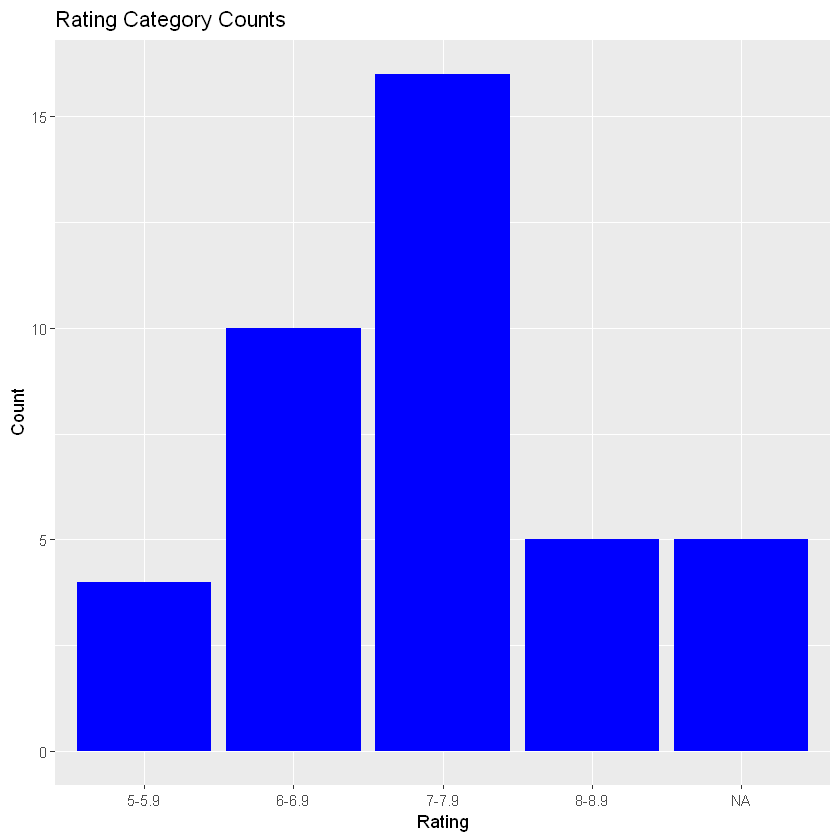

In [36]:
ggplot(rating_count, aes(x = RatingCategory, y = Count)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Rating Category Counts", x = "Rating", y = "Count")

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

In [37]:
# Load the libraries

In [38]:
library(httr)
library(jsonlite)

Warning message:
"package 'httr' was built under R version 4.2.3"

Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




In [39]:
# Define the base URL

In [40]:
base_url <- "http://api.digitalnz.org/records.json"

In [41]:
# Querying parameter information about COVID-19 in New Zealand

In [42]:
parameter <- list(
  text = "COVID19 NZ"   
)

In [43]:
# Send a reques

In [44]:
response <- GET(url = base_url, query = parameter)

In [45]:
# Parse JSON response

In [46]:
parsed_info <- content(response, "text")
info_df <- fromJSON(parsed_info)

In [47]:
# Output all information

In [48]:
print(info_df)

$search
$search$page
[1] 1

$search$per_page
[1] 20

$search$result_count
[1] 10113

$search$request_url
[1] "https://api.digitalnz.org/records.json?text=COVID19%20NZ"

$search$results
         id                    created_at                    updated_at
1  44607591 2020-11-20T02:12:19.993+13:00 2023-09-01T02:30:28.762+12:00
2  43201326 2020-03-23T11:00:14.924+13:00 2020-03-23T11:00:14.982+13:00
3  47656489 2022-02-11T11:00:12.993+13:00 2022-02-15T01:56:22.285+13:00
4  43201339 2020-03-23T11:00:15.412+13:00 2020-03-23T11:00:15.447+13:00
5  43202129 2020-03-24T11:00:21.456+13:00 2020-03-24T11:00:21.470+13:00
6  43202847 2020-03-25T11:00:33.162+13:00 2020-03-25T11:00:33.199+13:00
7  43769995 2020-06-29T01:56:28.855+12:00 2020-06-29T01:56:28.935+12:00
8  45990307 2021-11-12T05:13:42.135+13:00 2021-11-19T05:13:56.742+13:00
9  43374670 2020-04-07T01:56:22.759+12:00 2020-04-07T01:56:22.772+12:00
10 43212407 2020-04-02T11:00:21.816+13:00 2020-04-02T11:00:21.861+13:00
11 43710488 2020-06-16T

In [49]:
# Extract the title columns

In [50]:
title_df <- info_df$search$results["title"]
title_df

,title
,<chr>
1,[Deprecated] COVID-19 Data Activity Catalogue
2,Coronavirus: NZ sharemarket open higher as Air NZ's share price slumps
3,NZ study on Covid-19 impacts launched
4,Live coronavirus updates in NZ and around the world on 20 March
5,Coronavirus live updates in NZ and around the world on 21 March
6,Coronavirus live updates in NZ and around the world
7,NZ cautious about Fiji 'Bula Bubble'
8,Appendix 1 – Notice for Phase 1 of Point-of-Care Testing Programme
9,Auckland Council launches effort to co-ordinate Covid-19 support for Māori


In [51]:
# Extract the primary_collection columns

In [52]:
primary_collection_df <- info_df$search$results["primary_collection"]
primary_collection_df

,primary_collection
,<list>
1,data.govt.nz
2,Radio New Zealand
3,Radio New Zealand
4,Radio New Zealand
5,Radio New Zealand
6,Radio New Zealand
7,Radio New Zealand
8,New Zealand Gazette
9,Radio New Zealand


In [53]:
# Merge the two data frame

In [54]:
merged_df <- title_df %>%
  mutate(primary_collection = glue("{primary_collection_df$primary_collection}"))
merged_df

,title,primary_collection
,<chr>,<glue>
1,[Deprecated] COVID-19 Data Activity Catalogue,data.govt.nz
2,Coronavirus: NZ sharemarket open higher as Air NZ's share price slumps,Radio New Zealand
3,NZ study on Covid-19 impacts launched,Radio New Zealand
4,Live coronavirus updates in NZ and around the world on 20 March,Radio New Zealand
5,Coronavirus live updates in NZ and around the world on 21 March,Radio New Zealand
6,Coronavirus live updates in NZ and around the world,Radio New Zealand
7,NZ cautious about Fiji 'Bula Bubble',Radio New Zealand
8,Appendix 1 – Notice for Phase 1 of Point-of-Care Testing Programme,New Zealand Gazette
9,Auckland Council launches effort to co-ordinate Covid-19 support for Māori,Radio New Zealand


In [55]:
# Make a bar chart of merged_df

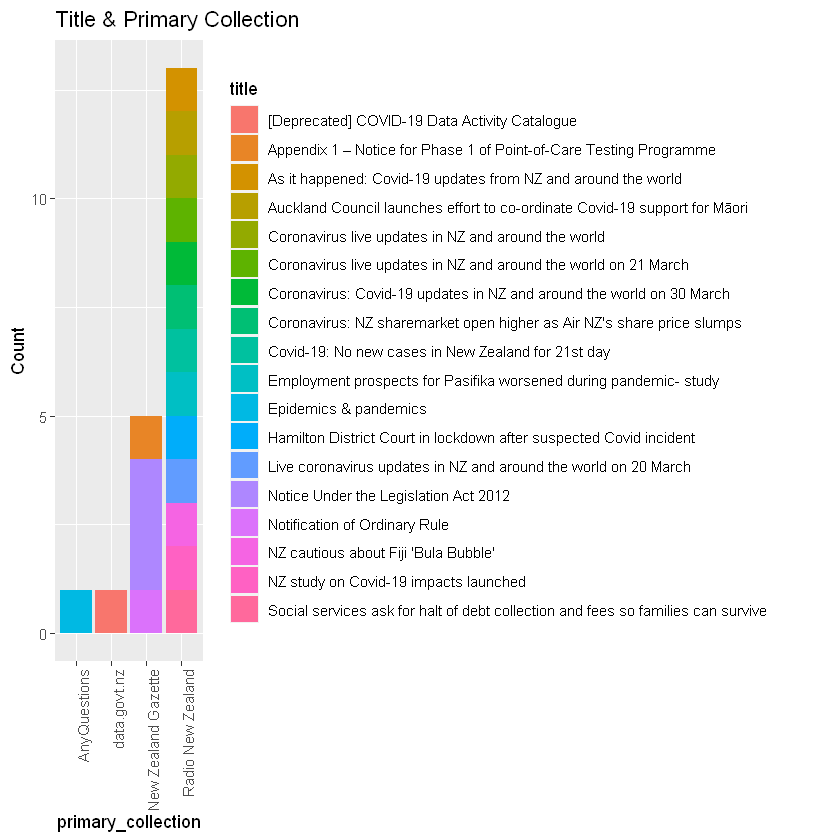

In [56]:
ggplot(merged_df, aes(x = primary_collection, fill = title)) +
  geom_bar() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Title & Primary Collection", x = "primary_collection", y = "Count") 